## Analysis v4

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from natsort import index_natsorted

### Calculating the Variance of the AF and FPS values 

It would be quite interesting to see if for each variant site per motif, the variance of the AF and FPS values are correlated.

I.e. if a variant site has a high variance in AF values, does it also have a high variance in FPS values?

In [2]:
# import the data
filename = '/home/msazizan/hyperspace/gatk-workflow/plotting/output-data/combined_matrix/E2F5_E2F5_HUMAN.H11MO.0.B_fpscore-af-varsites-combined-matrix-wide.tsv'
matrix_afps = pd.read_csv(filename, sep='\t')
# extract motif id from filename
motif_id = os.path.basename(filename).replace('_fpscore-af-varsites-combined-matrix-wide.tsv', '')
motif_id

'E2F5_E2F5_HUMAN.H11MO.0.B'

In [3]:
matrix_afps

Chromosome      Start        End  98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
0          chr1     905473     905483           0.10260            0.12218   
1          chr1     925405     925415           0.09540            0.03670   
2          chr1    1020750    1020760           0.09749            0.09080   
3          chr1    1130413    1130423           0.11471            0.04786   
4          chr1    1225277    1225287           0.01792            0.04624   
...         ...        ...        ...               ...                ...   
2180       chrX  118300271  118300281           0.00703            0.00985   
2181       chrX  119211181  119211191           0.01215            0.01187   
2182       chrX  139342109  139342119           0.02016            0.00831   
2183       chrX  147508113  147508123           0.00810            0.00633   
2184       chrX  150849074  150849084           0.34392            0.07363   

      S6R691V_her2_fps  PU24GB8_lumB_fps  2GAMBDQ_norm_fps  \
0              0.13921           0.12024           0.14062   
1              0.09011           0.05082           0.05586   
2              0.07864           0.10880           0.08458   
3              0.11338           0.14384           0.15151   
4              0.02729           0.01957           0.02657   
...                ...               ...               ...   
2180           0.00556           0.00611           0.00910   
2181           0.01025           0.01366           0.01454   
2182           0.02155           0.01655           0.02160   
2183           0.00697           0.00629           0.01465   
2184           0.35995           0.24735           0.20522   

      2GAMBDQ_norm_varsite_pos 2GAMBDQ_norm_ref_allele  ... ANAB5F7_basal_AF  \
0                          NaN                     NaN  ...         0.000000   
1                     925409.0                       T  ...         0.730769   
2                    1020755.0                       C  ...         0.000000   
3                    1130420.0                       C  ...         0.062500   
4                    1225285.0                       G  ...         0.062500   
...                        ...                     ...  ...              ...   
2180                       NaN                     NaN  ...         0.000000   
2181                       NaN                     NaN  ...         0.093750   
2182                       NaN                     NaN  ...         0.000000   
2183                       NaN                     NaN  ...         0.045455   
2184               150849077.0                       C  ...         0.600000   

      PU24GB8_lumB_varsite_pos  PU24GB8_lumB_ref_allele  \
0                     905474.0                        G   
1                     925409.0                        T   
2                          NaN                      NaN   
3                    1130420.0                        C   
4                    1225285.0                        G   
...                        ...                      ...   
2180               118300279.0                        G   
2181                       NaN                      NaN   
2182                       NaN                      NaN   
2183                       NaN                      NaN   
2184               150849077.0                        C   

     PU24GB8_lumB_alt_allele PU24GB8_lumB_AF  S6R691V_her2_varsite_pos  \
0                          A        0.027778                       NaN   
1                          C        0.769231                  925409.0   
2                        NaN        0.000000                       NaN   
3                          T        0.131579                 1130420.0   
4                          A        0.078947                 1225285.0   
...                      ...             ...                       ...   
2180                       A        0.071429                       NaN   
2181                     NaN        0.000000               11

In [4]:
afps_df = matrix_afps.filter(regex='_AF$|_fps$|_id$')
afps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  S6R691V_her2_fps  PU24GB8_lumB_fps  \
0              0.10260            0.12218           0.13921           0.12024   
1              0.09540            0.03670           0.09011           0.05082   
2              0.09749            0.09080           0.07864           0.10880   
3              0.11471            0.04786           0.11338           0.14384   
4              0.01792            0.04624           0.02729           0.01957   
...                ...                ...               ...               ...   
2180           0.00703            0.00985           0.00556           0.00611   
2181           0.01215            0.01187           0.01025           0.01366   
2182           0.02016            0.00831           0.02155           0.01655   
2183           0.00810            0.00633           0.00697           0.00629   
2184           0.34392            0.07363           0.35995           0.24735   

      2GAMBDQ_norm_fps  2GAMBDQ_norm_AF  98JKPD8_lumA_AF  ANAB5F7_basal_AF  \
0              0.14062         0.000000         0.000000          0.000000   
1              0.05586         1.000000         1.000000          0.730769   
2              0.08458         0.062500         0.000000          0.000000   
3              0.15151         0.250000         0.181818          0.062500   
4              0.02657         0.071429         0.090909          0.062500   
...                ...              ...              ...               ...   
2180           0.00910         0.000000         0.000000          0.000000   
2181           0.01454         0.000000         0.050000          0.093750   
2182           0.02160         0.000000         0.000000          0.000000   
2183           0.01465         0.000000         0.000000          0.045455   
2184           0.20522         0.750000         0.500000          0.600000   

      PU24GB8_lumB_AF  S6R691V_her2_AF                 region_id  
0            0.027778         0.000000        chr1:905473-905483  
1            0.769231         0.730769        chr1:925405-925415  
2            0.000000         0.000000      chr1:1020750-1020760  
3            0.131579         0.147059      chr1:1130413-1130423  
4            0.078947         0.088235      chr1:1225277-1225287  
...               ...              ...                       ...  
2180         0.071429         0.000000  chrX:118300271-118300281  
2181         0.000000         0.062500  chrX:119211181-119211191  
2182         0.000000         0.066667  chrX:139342109-139342119  
2183         0.000000         0.000000  chrX:147508113-147508123  
2184         0.605263         0.588235  chrX:150849074-150849084  

[2185 rows x 11 columns]

In [5]:
# convert to long format
afps_df_long = afps_df.melt(id_vars=["region_id"], var_name="variable", value_name="value")

# split the variable column into sample_id and type columns using reverse split string method, which returns a dataframe of columns based on the number of splits (n=x); this can directly be assigned to new columns in the original dataframe
afps_df_long[['sample_id', 'type']] = afps_df_long['variable'].str.rsplit('_', n=1, expand=True)

# drop the redundant 'variable' column
afps_df_long = afps_df_long.drop(columns=["variable"])

# now pivot the dataframe to create new columns based on the type column
afps_df_lpv = afps_df_long.pivot(index=['region_id', 'sample_id'], columns='type', values='value').reset_index()

# remove the index name and rename the columns to match the type values
afps_df_lpv = afps_df_lpv.rename_axis(None, axis=1).rename(columns={'fps': 'FPS'})

# sort the dataframe by region_id naturally
afps_df_lpv = afps_df_lpv.reindex(index=index_natsorted(afps_df_lpv['region_id']))
afps_df_lpv = afps_df_lpv.reset_index(drop=True)
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921
...                         ...            ...       ...      ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995

[10925 rows x 4 columns]

In [6]:
# extract fps columns
fps_df = matrix_afps.filter(regex='_fps$|_id$')
# calculate variance of fps values across samples per region_id and add to a new column called 'fps_var'
fps_df = fps_df.set_index('region_id')
fps_df['fps_var'] = fps_df.var(axis=1)
# calculate the coefficient of variation (CV) of fps values across samples per region_id and add to a new column called 'fps_cv'
fps_df['fps_cv'] = fps_df.drop(columns=['fps_var']).std(axis=1) / fps_df.drop(columns=['fps_var']).mean(axis=1) * 100
# calculate the quartile coefficient of dispersion (QCD) of fps values across samples per region_id and add to a new column called 'fps_qcd'
fps_df['fps_qcd'] = (fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.75, axis=1) - fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.25, axis=1)) / (fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.75, axis=1) + fps_df.drop(columns=['fps_var', 'fps_cv']).quantile(q=0.25, axis=1))
fps_df

98JKPD8_lumA_fps  ANAB5F7_basal_fps  \
region_id                                                       
chr1:905473-905483                 0.10260            0.12218   
chr1:925405-925415                 0.09540            0.03670   
chr1:1020750-1020760               0.09749            0.09080   
chr1:1130413-1130423               0.11471            0.04786   
chr1:1225277-1225287               0.01792            0.04624   
...                                    ...                ...   
chrX:118300271-118300281           0.00703            0.00985   
chrX:119211181-119211191           0.01215            0.01187   
chrX:139342109-139342119           0.02016            0.00831   
chrX:147508113-147508123           0.00810            0.00633   
chrX:150849074-150849084           0.34392            0.07363   

                          S6R691V_her2_fps  PU24GB8_lumB_fps  \
region_id                                                      
chr1:905473-905483                 0.13921           0.12024   
chr1:925405-925415                 0.09011           0.05082   
chr1:1020750-1020760               0.07864           0.10880   
chr1:1130413-1130423               0.11338           0.14384   
chr1:1225277-1225287               0.02729           0.01957   
...                                    ...               ...   
chrX:118300271-118300281           0.00556           0.00611   
chrX:119211181-119211191           0.01025           0.01366   
chrX:139342109-139342119           0.02155           0.01655   
chrX:147508113-147508123           0.00697           0.00629   
chrX:150849074-150849084           0.35995           0.24735   

                          2GAMBDQ_norm_fps   fps_var     fps_cv   fps_qcd  
region_id                                                                  
chr1:905473-905483                 0.14062  0.000245  12.513952  0.073116  
chr1:925405-925415                 0.05586  0.000659  39.035214  0.278791  
chr1:1020750-1020760               0.08458  0.000137  12.706353  0.070907  
chr1:1130413-1130423               0.15151  0.001668  35.745328  0.118420  
chr1:1225277-1225287               0.02657  0.000127  40.902769  0.164746  
...                                    ...       ...        ...       ...  
chrX:118300271-118300281           0.00910  0.000003  24.840211  0.196581  
chrX:119211181-119211191           0.01454  0.000003  13.326409  0.070114  
chrX:139342109-139342119           0.02160  0.000031  31.771630  0.131234  
chrX:147508113-147508123           0.01465  0.000012  41.714641  0.122661  
chrX:150849074-150849084           0.20522  0.013487  47.206586  0.252577  

[2185 rows x 8 columns]

In [7]:
# subset for just the fps_var column
fps_measures_df = fps_df[['fps_var', 'fps_cv', 'fps_qcd']]
fps_measures_df

fps_var     fps_cv   fps_qcd
region_id                                              
chr1:905473-905483        0.000245  12.513952  0.073116
chr1:925405-925415        0.000659  39.035214  0.278791
chr1:1020750-1020760      0.000137  12.706353  0.070907
chr1:1130413-1130423      0.001668  35.745328  0.118420
chr1:1225277-1225287      0.000127  40.902769  0.164746
...                            ...        ...       ...
chrX:118300271-118300281  0.000003  24.840211  0.196581
chrX:119211181-119211191  0.000003  13.326409  0.070114
chrX:139342109-139342119  0.000031  31.771630  0.131234
chrX:147508113-147508123  0.000012  41.714641  0.122661
chrX:150849074-150849084  0.013487  47.206586  0.252577

[2185 rows x 3 columns]

In [8]:
afps_df_lpv

region_id      sample_id        AF      FPS
0            chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062
1            chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260
2            chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218
3            chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024
4            chr1:905473-905483   S6R691V_her2  0.000000  0.13921
...                         ...            ...       ...      ...
10920  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522
10921  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392
10922  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363
10923  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735
10924  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995

[10925 rows x 4 columns]

In [9]:
# afps_df_lpv[afps_df_lpv['FPS'] == 0]

In [10]:
# merge fps_measures_df with afps_df_lpv on index and region_id
matrix_afps_long = afps_df_lpv.set_index('region_id')
matrix_afps_merged = matrix_afps_long.merge(fps_measures_df, left_index=True, right_index=True)
# sort naturally by region_id
matrix_afps_merged = matrix_afps_merged.reset_index().reindex(index=index_natsorted(matrix_afps_merged.index))

matrix_afps_merged

region_id      sample_id        AF      FPS   fps_var  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062  0.000245   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260  0.000245   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218  0.000245   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024  0.000245   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921  0.000245   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  
5145   12.513952  0.073116  
5146   12.513952  0.073116  
5147   12.513952  0.073116  
5148   12.513952  0.073116  
5149   12.513952  0.073116  
...          ...       ...  
10780  47.206586  0.252577  
10781  47.206586  0.252577  
10782  47.206586  0.252577  
10783  47.206586  0.252577  
10784  47.206586  0.252577  

[10925 rows x 7 columns]

From here, it makes sense to filter out variant sites that has `fps_cv` or `fps_qcd` values `== NaN`. This means that the raw FPS values across subtypes are zero, i.e. there is no evidence of footprinting at all at these sites despite a TFBS being present, leading to an undefined CV and QCD value.

We are not interested in footprints that carry no called variants so we can also filter out all rows with `AF == 0`, as these represent sites that are not variant at all. The only reason they are in the matrix is because during the raw data merging, these sites are retained when there is at least one subtype that has a non-zero AF value at that site, or non-zero FPS values at that site.

However, we would still be interested in sites with AF values not equal zero at least in one of the subtypes, so we do not want to filter out sites that have at least one non-zero AF value.

In [11]:
# filter out unique region_id rows that have fps_cv == NaN OR fps_qcd == NaN
matrix_afps_merged_filt = matrix_afps_merged[~(matrix_afps_merged['fps_cv'].isna() | matrix_afps_merged['fps_qcd'].isna())]
matrix_afps_merged_filt

region_id      sample_id        AF      FPS   fps_var  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062  0.000245   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260  0.000245   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218  0.000245   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024  0.000245   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921  0.000245   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  
5145   12.513952  0.073116  
5146   12.513952  0.073116  
5147   12.513952  0.073116  
5148   12.513952  0.073116  
5149   12.513952  0.073116  
...          ...       ...  
10780  47.206586  0.252577  
10781  47.206586  0.252577  
10782  47.206586  0.252577  
10783  47.206586  0.252577  
10784  47.206586  0.252577  

[10755 rows x 7 columns]

In [12]:
# filter out unique region_id rows that have AF == 0 in all subtypes (sample_id grouping)
# this has to be per group, so we need to groupby first
matrix_afps_merged_filt = matrix_afps_merged_filt.groupby('region_id').filter(lambda x: (x['AF'] != 0).any())
matrix_afps_merged_filt

region_id      sample_id        AF      FPS   fps_var  \
5145         chr1:905473-905483   2GAMBDQ_norm  0.000000  0.14062  0.000245   
5146         chr1:905473-905483   98JKPD8_lumA  0.000000  0.10260  0.000245   
5147         chr1:905473-905483  ANAB5F7_basal  0.000000  0.12218  0.000245   
5148         chr1:905473-905483   PU24GB8_lumB  0.027778  0.12024  0.000245   
5149         chr1:905473-905483   S6R691V_her2  0.000000  0.13921  0.000245   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  
5145   12.513952  0.073116  
5146   12.513952  0.073116  
5147   12.513952  0.073116  
5148   12.513952  0.073116  
5149   12.513952  0.073116  
...          ...       ...  
10780  47.206586  0.252577  
10781  47.206586  0.252577  
10782  47.206586  0.252577  
10783  47.206586  0.252577  
10784  47.206586  0.252577  

[10185 rows x 7 columns]

Now we can select unique `region_id`s that have at least one AF value in the subtype group that is equal to 0 AND the max AF value in the subtype group is more than 0.5. This is because for sites that have a called variant in at least one subtype, we are only interested in them if the called variant has AF of more than 0.5.

In [13]:
# for each unique region_id, find those that has AF == 0 in at least one subtype
# this has to be per group, so we need to groupby first
region_af_zero = matrix_afps_merged_filt.groupby('region_id').filter(lambda x: (x['AF'] == 0).any())

# then find the max AF value for each region_id and add to a new column called 'max_AF'
import natsort
df = region_af_zero.groupby('region_id').agg({'AF': 'max'}).rename(columns={'AF': 'max_AF'}).reset_index()
max_af = df.reindex(index=natsort.index_natsorted(df['region_id']))
max_af

region_id    max_AF
640         chr1:905473-905483  0.027778
526       chr1:1020750-1020760  0.062500
617       chr1:3432506-3432516  0.166667
625       chr1:3948502-3948512  0.181818
629       chr1:5274704-5274714  0.250000
...                        ...       ...
1365  chrX:115338019-115338029  0.029412
1366  chrX:118300271-118300281  0.071429
1367  chrX:119211181-119211191  0.093750
1368  chrX:139342109-139342119  0.066667
1369  chrX:147508113-147508123  0.045455

[1390 rows x 2 columns]

In [14]:
# now return a boolean mask for regions that have max_AF <= 0.5
mask = max_af['max_AF'] <= 0.5
mask.sum()

1379

In [21]:
# now filter the merged matrix_afps such that for rows that have region_id in the max_af dataframe, discard them
# this is done by subsetting the long dataframe with an expression that makes use of isin() method on the max_af dataframe masked by the boolean series, and then taking the inverse of the expression using ~
matrix_afps_merged_filt = matrix_afps_merged_filt[~(matrix_afps_merged_filt['region_id'].isin(max_af[mask]['region_id']))]

In [22]:
matrix_afps_merged_filt

region_id      sample_id        AF      FPS   fps_var  \
5160         chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586  0.000659   
5161         chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540  0.000659   
5162         chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670  0.000659   
5163         chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082  0.000659   
5164         chr1:925405-925415   S6R691V_her2  0.730769  0.09011  0.000659   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  
5160   39.035214  0.278791  
5161   39.035214  0.278791  
5162   39.035214  0.278791  
5163   39.035214  0.278791  
5164   39.035214  0.278791  
...          ...       ...  
10780  47.206586  0.252577  
10781  47.206586  0.252577  
10782  47.206586  0.252577  
10783  47.206586  0.252577  
10784  47.206586  0.252577  

[3290 rows x 7 columns]

Now we can calculate the median for AF values as well as the CV and QCD.

In [37]:
# copy the filtered dataframe
afps_merged_filt_df = matrix_afps_merged_filt.copy()
# calculate AF median per region_id
afps_merged_filt_df['AF_median'] = afps_merged_filt_df.groupby('region_id')['AF'].transform('median')
afps_merged_filt_df


region_id      sample_id        AF      FPS   fps_var  \
5160         chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586  0.000659   
5161         chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540  0.000659   
5162         chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670  0.000659   
5163         chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082  0.000659   
5164         chr1:925405-925415   S6R691V_her2  0.730769  0.09011  0.000659   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  AF_median  
5160   39.035214  0.278791   0.769231  
5161   39.035214  0.278791   0.769231  
5162   39.035214  0.278791   0.769231  
5163   39.035214  0.278791   0.769231  
5164   39.035214  0.278791   0.769231  
...          ...       ...        ...  
10780  47.206586  0.252577   0.600000  
10781  47.206586  0.252577   0.600000  
10782  47.206586  0.252577   0.600000  
10783  47.206586  0.252577   0.600000  
10784  47.206586  0.252577   0.600000  

[3290 rows x 8 columns]

In [38]:
# calculate the variance of AF per region_id and add to a new column called 'AF_var'
afps_merged_filt_df['AF_var'] = afps_merged_filt_df.groupby('region_id')['AF'].transform('var')
afps_merged_filt_df['AF_cv'] = afps_merged_filt_df.groupby('region_id')['AF'].transform(lambda x: x.std() / x.mean() * 100)

# set a small constant for QCD calculation to prevent NaN due to division by zero
constant = 0.0001
afps_merged_filt_df['AF_qcd'] = afps_merged_filt_df.groupby('region_id')['AF'].transform(lambda x: (x.quantile(q=0.75) - x.quantile(q=0.25)) / (x.quantile(q=0.75) + x.quantile(q=0.25) + constant))
afps_merged_filt_df

region_id      sample_id        AF      FPS   fps_var  \
5160         chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586  0.000659   
5161         chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540  0.000659   
5162         chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670  0.000659   
5163         chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082  0.000659   
5164         chr1:925405-925415   S6R691V_her2  0.730769  0.09011  0.000659   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  AF_median    AF_var      AF_cv    AF_qcd  
5160   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5161   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5162   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5163   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5164   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
...          ...       ...        ...       ...        ...       ...  
10780  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10781  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10782  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10783  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10784  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  

[3290 rows x 11 columns]

Let's visualize the AF distribution for each variant site.

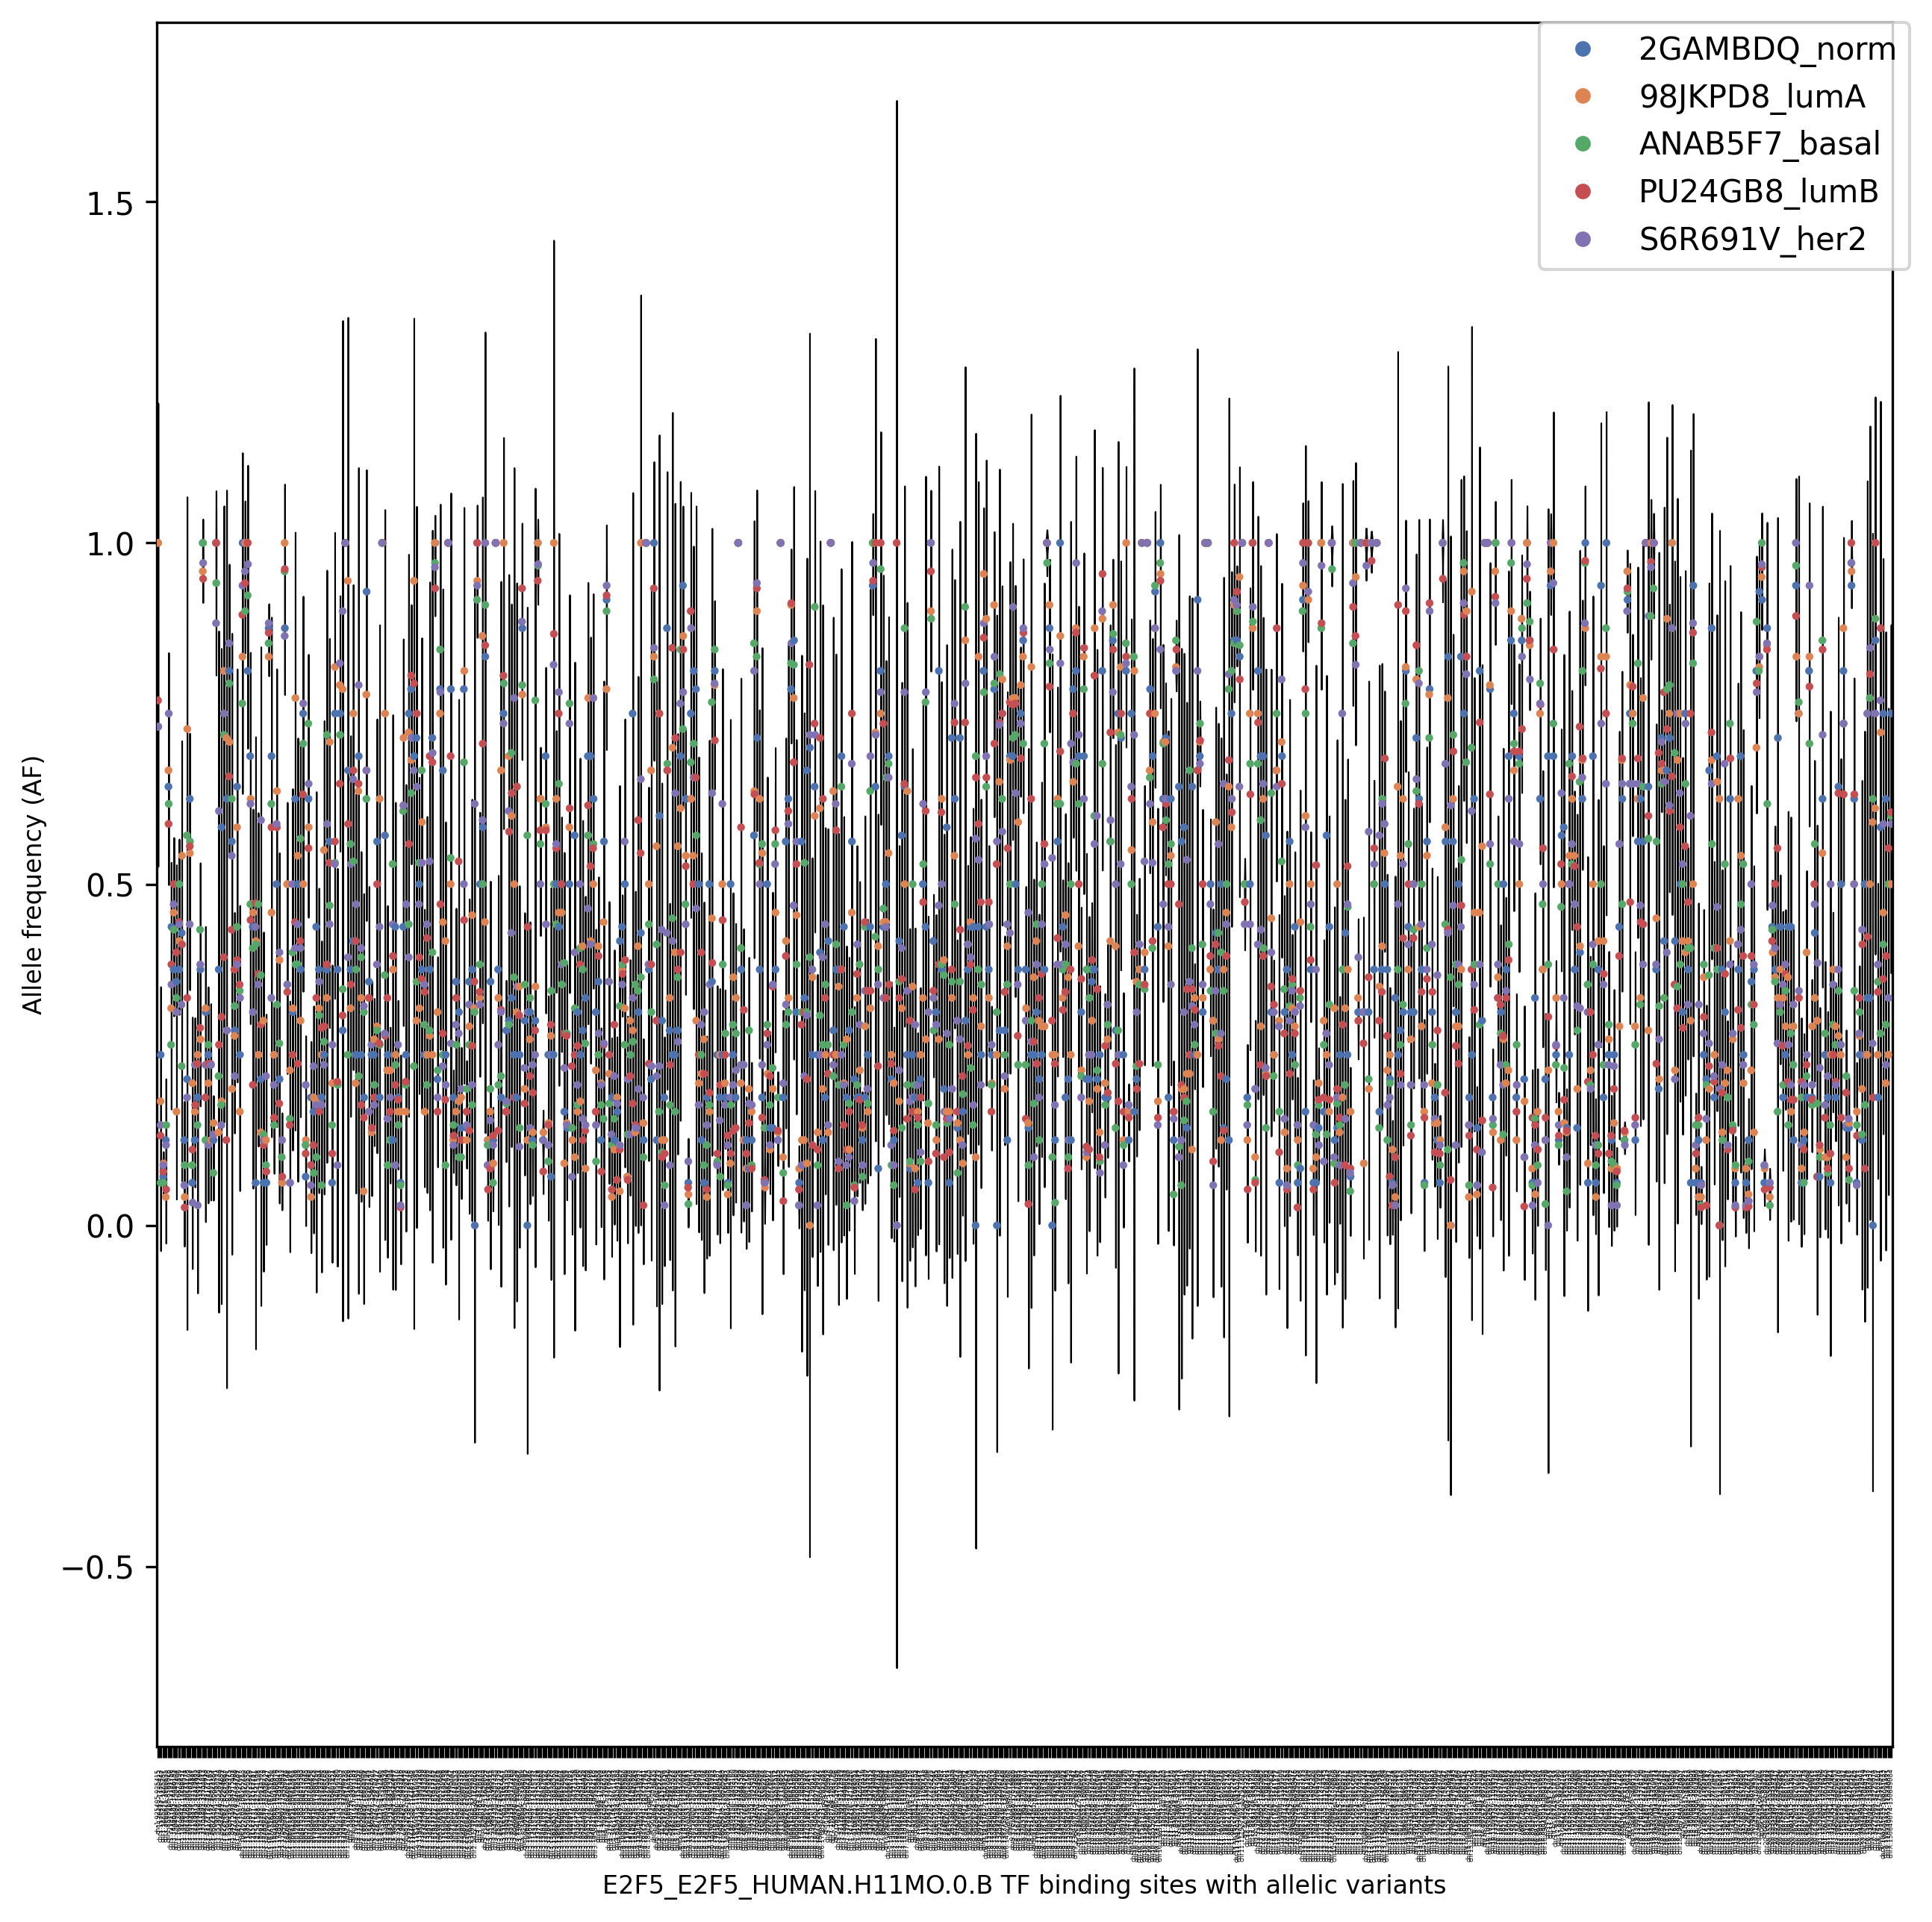

In [41]:
# plot violin plot for AF on the filtered dataframe
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='AF', data=afps_merged_filt_df, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
plt.xticks(rotation=90, fontsize=2)
sns.stripplot(x='region_id', y='AF', data=afps_merged_filt_df, hue='sample_id', size=2.5, jitter=True, palette='deep')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)
plt.show()

Plotting the whole data makes the plot look very busy. We can split the data into 2 groups: 'high AF' and 'low AF'. We will define 'high AF' as `AF_median` > 0.5, and 'low AF' as `AF_median` <= 0.5. 

In [42]:
# to ensure that each unique region_id is retained as a group of subtype rows, we need to filter after grouping per region_id
high_af = afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF_median'] > 0.5).any())
high_af

region_id      sample_id        AF      FPS   fps_var  \
5160         chr1:925405-925415   2GAMBDQ_norm  1.000000  0.05586  0.000659   
5161         chr1:925405-925415   98JKPD8_lumA  1.000000  0.09540  0.000659   
5162         chr1:925405-925415  ANAB5F7_basal  0.730769  0.03670  0.000659   
5163         chr1:925405-925415   PU24GB8_lumB  0.769231  0.05082  0.000659   
5164         chr1:925405-925415   S6R691V_her2  0.730769  0.09011  0.000659   
...                         ...            ...       ...      ...       ...   
10780  chrX:150849074-150849084   2GAMBDQ_norm  0.750000  0.20522  0.013487   
10781  chrX:150849074-150849084   98JKPD8_lumA  0.500000  0.34392  0.013487   
10782  chrX:150849074-150849084  ANAB5F7_basal  0.600000  0.07363  0.013487   
10783  chrX:150849074-150849084   PU24GB8_lumB  0.605263  0.24735  0.013487   
10784  chrX:150849074-150849084   S6R691V_her2  0.588235  0.35995  0.013487   

          fps_cv   fps_qcd  AF_median    AF_var      AF_cv    AF_qcd  
5160   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5161   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5162   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5163   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
5164   39.035214  0.278791   0.769231  0.019970  16.701075  0.155547  
...          ...       ...        ...       ...        ...       ...  
10780  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10781  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10782  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10783  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  
10784  47.206586  0.252577   0.600000  0.008072  14.759972  0.014266  

[1115 rows x 11 columns]

In [43]:
low_af = afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF_median'] <= 0.5).any())
low_af

region_id      sample_id        AF      FPS   fps_var  \
4240       chr1:1130413-1130423   2GAMBDQ_norm  0.250000  0.15151  0.001668   
4241       chr1:1130413-1130423   98JKPD8_lumA  0.181818  0.11471  0.001668   
4242       chr1:1130413-1130423  ANAB5F7_basal  0.062500  0.04786  0.001668   
4243       chr1:1130413-1130423   PU24GB8_lumB  0.131579  0.14384  0.001668   
4244       chr1:1130413-1130423   S6R691V_her2  0.147059  0.11338  0.001668   
...                         ...            ...       ...      ...       ...   
10750  chrX:116240865-116240875   2GAMBDQ_norm  0.250000  0.03826  0.000113   
10751  chrX:116240865-116240875   98JKPD8_lumA  0.250000  0.02826  0.000113   
10752  chrX:116240865-116240875  ANAB5F7_basal  0.500000  0.04863  0.000113   
10753  chrX:116240865-116240875   PU24GB8_lumB  0.552632  0.02045  0.000113   
10754  chrX:116240865-116240875   S6R691V_her2  0.333333  0.03239  0.000113   

          fps_cv   fps_qcd  AF_median    AF_var      AF_cv    AF_qcd  
4240   35.745328  0.118420   0.147059  0.004728  44.477978  0.160254  
4241   35.745328  0.118420   0.147059  0.004728  44.477978  0.160254  
4242   35.745328  0.118420   0.147059  0.004728  44.477978  0.160254  
4243   35.745328  0.118420   0.147059  0.004728  44.477978  0.160254  
4244   35.745328  0.118420   0.147059  0.004728  44.477978  0.160254  
...          ...       ...        ...       ...        ...       ...  
10750  31.587335  0.150331   0.333333  0.020035  37.525946  0.333289  
10751  31.587335  0.150331   0.333333  0.020035  37.525946  0.333289  
10752  31.587335  0.150331   0.333333  0.020035  37.525946  0.333289  
10753  31.587335  0.150331   0.333333  0.020035  37.525946  0.333289  
10754  31.587335  0.150331   0.333333  0.020035  37.525946  0.333289  

[2175 rows x 11 columns]

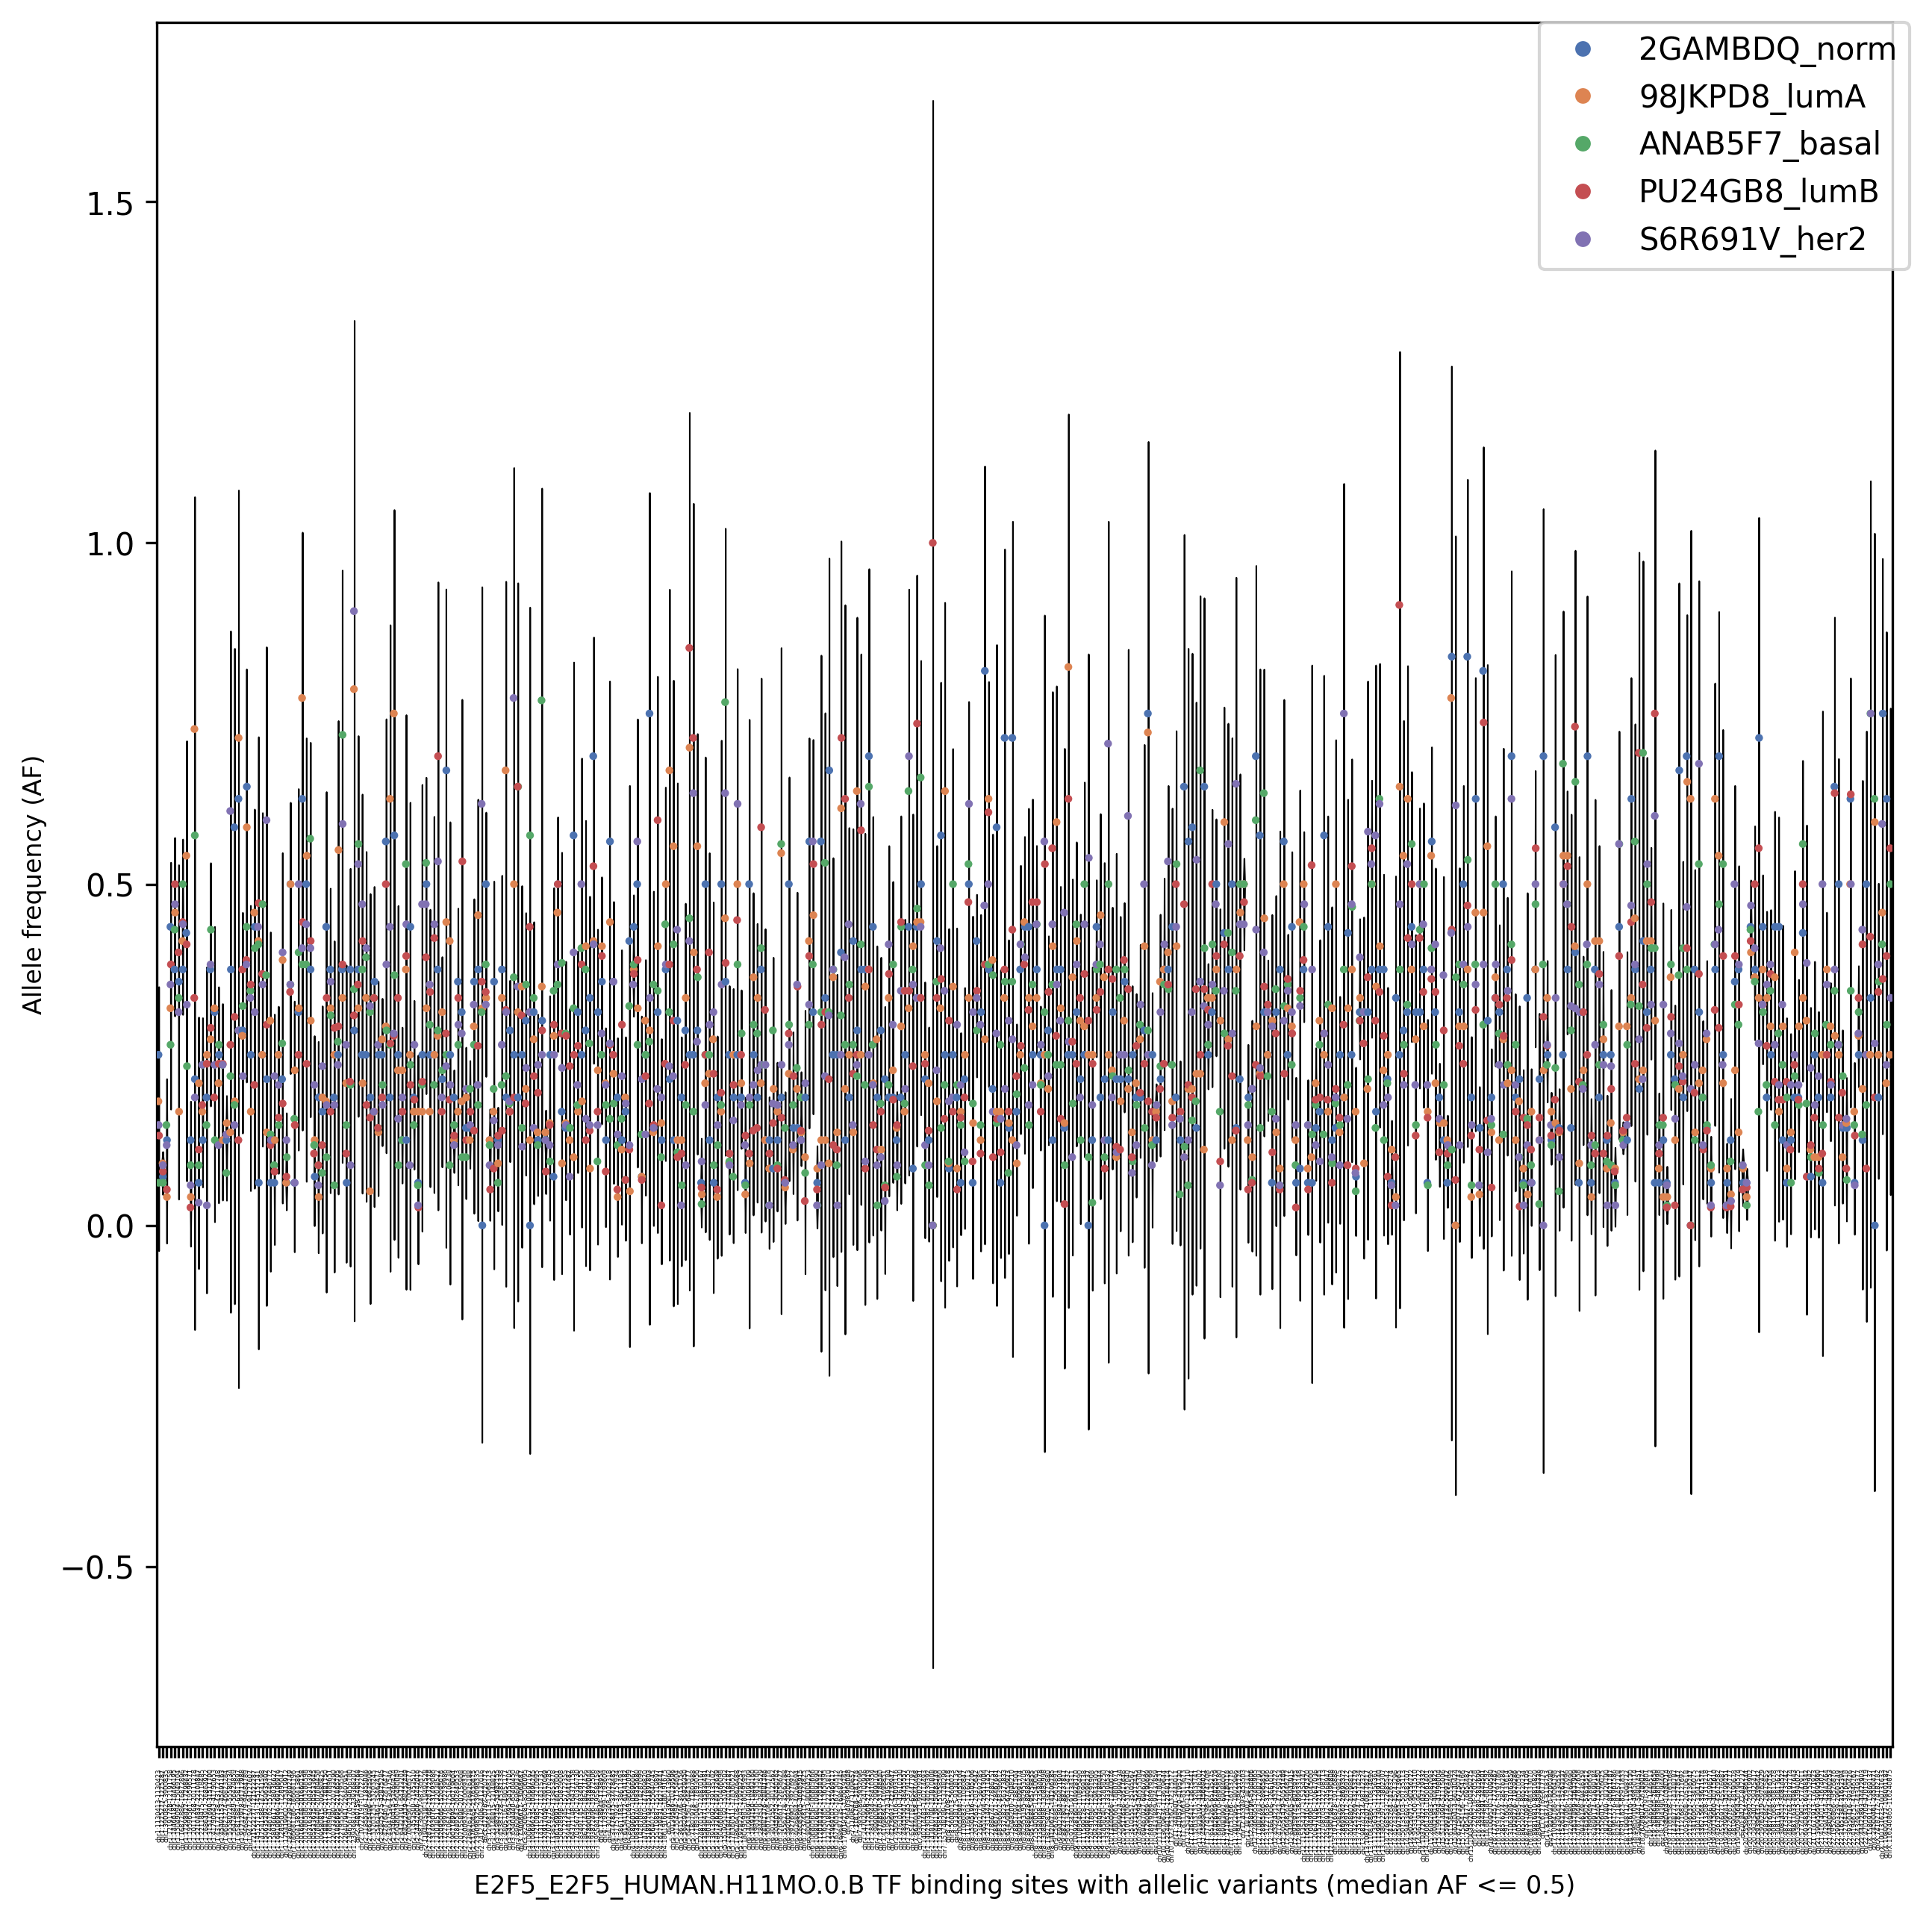

In [44]:
# plot violin plot for low AF set
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='AF', data=low_af, color='lightgray', inner='quartile', linecolor='black', linewidth=0.5)
plt.xticks(rotation=90, fontsize=2)
sns.stripplot(x='region_id', y='AF', data=low_af, hue='sample_id', size=2.5, jitter=True, palette='deep')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=2, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF <= 0.5)', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)
plt.show()

There are definitely sites that have individual subtype with AF == 0 retained, which means that there are sites with high variance. We can filter and plot only these regions to see which subtype it is.

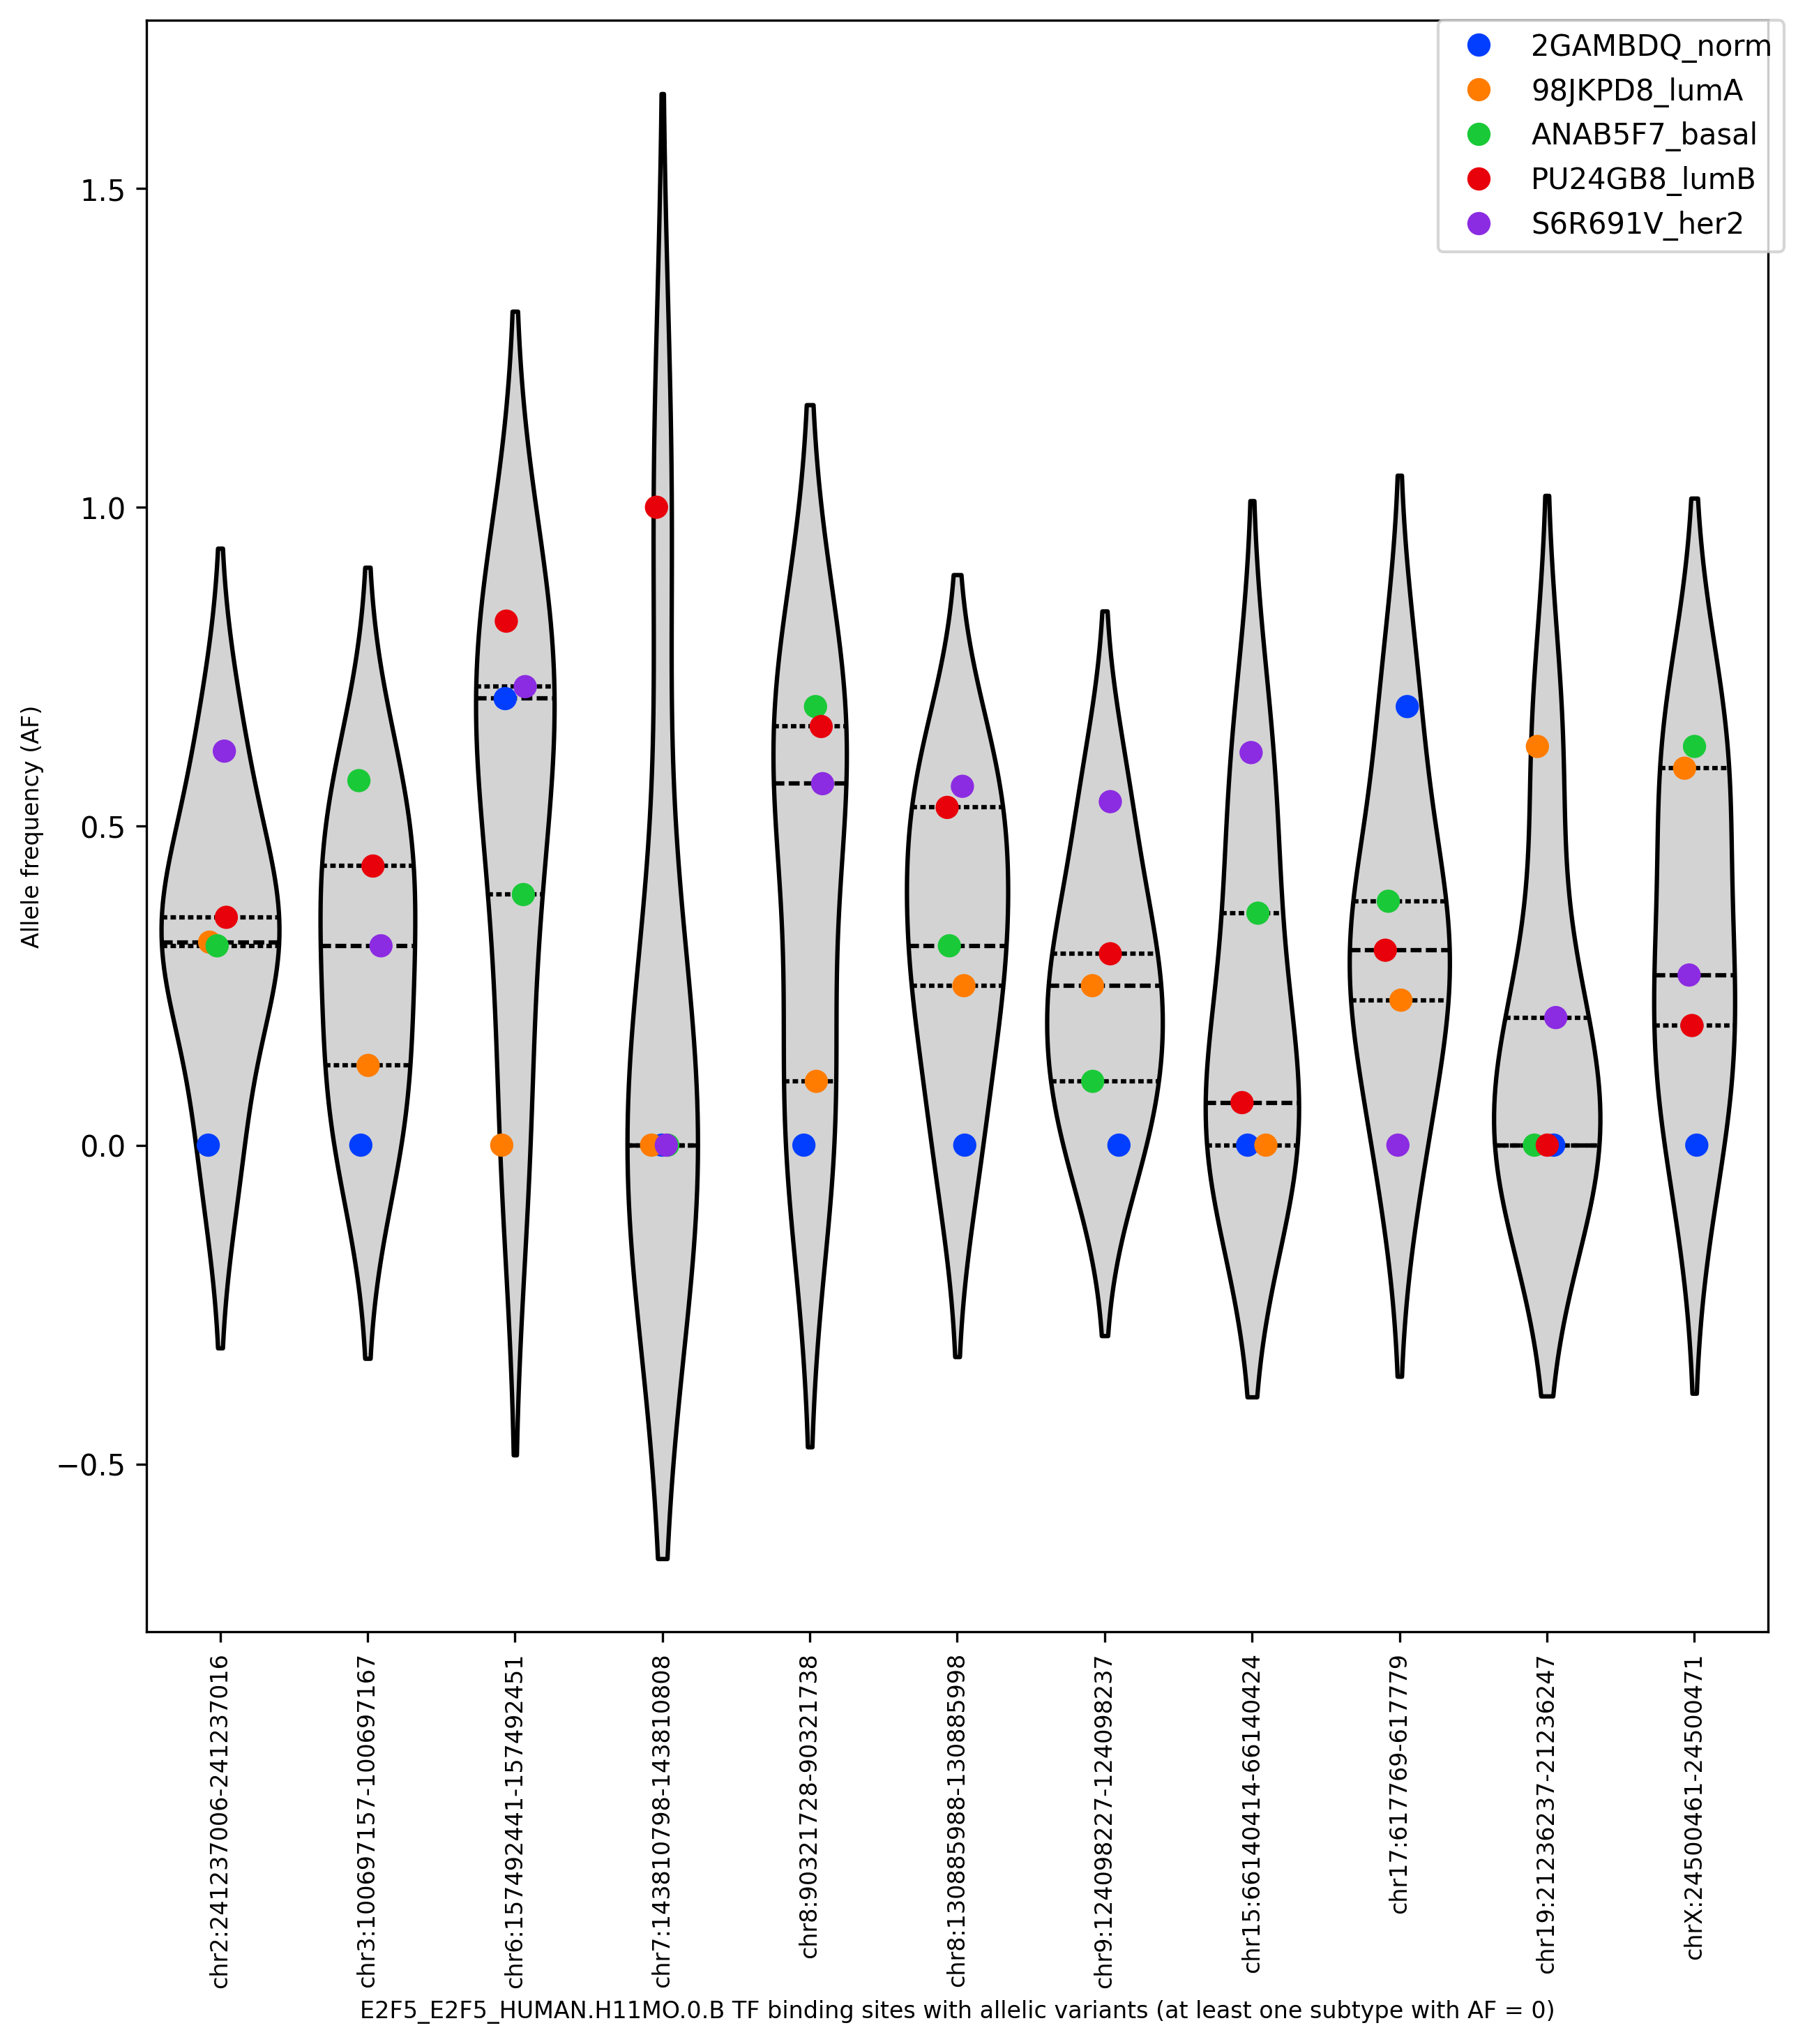

In [50]:
# plot violin plot for sites with at least one subtype with AF == 0
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='AF', data=afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), color='lightgray', inner='quartile', linecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=8)
sns.stripplot(x='region_id', y='AF', data=afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()), hue='sample_id', size=8, jitter=True, palette='bright')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=8)
plt.ylabel('Allele frequency (AF)', fontsize=8)
plt.show()

No clear pattern of enrichment of a specific subtype with high AF compared to the rest can be seen. We can use the subset of these to plot the distribution of the associated FPS values (unscaled). 

In [ ]:
afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any())

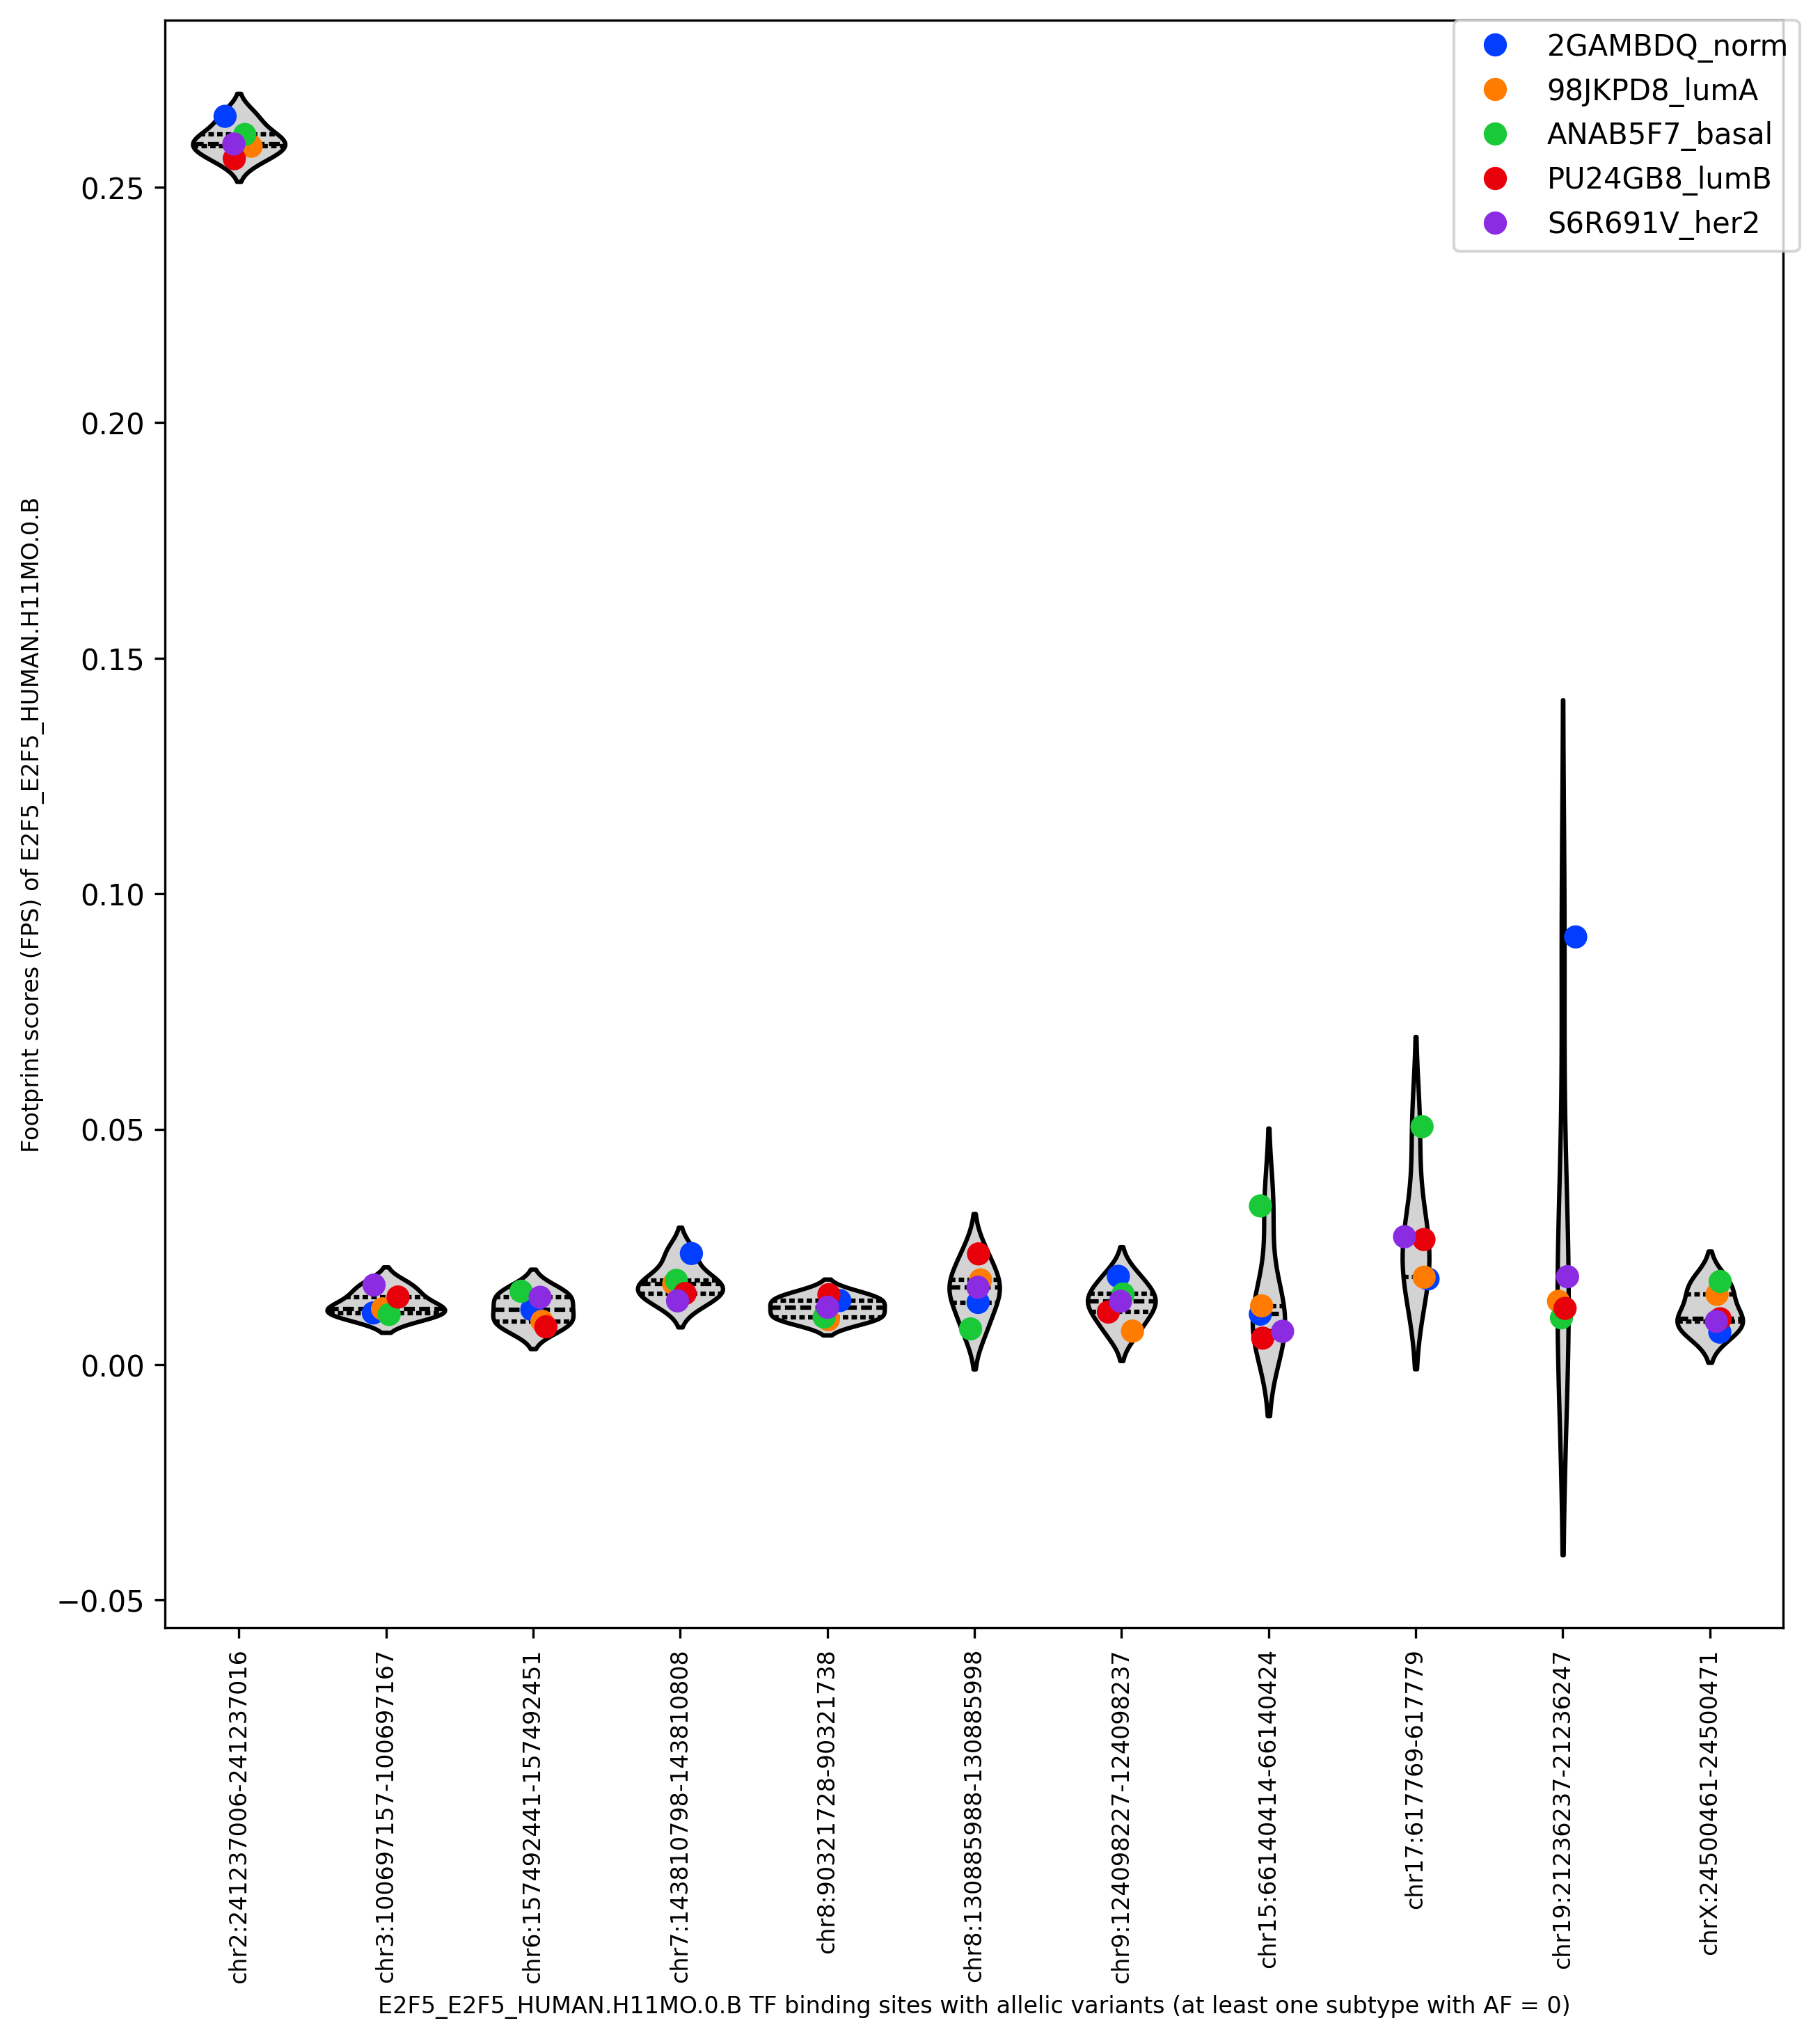

In [53]:
# First, extract these specific sites from the original matrix_afps dataframe
divergent_af_from_zero = afps_merged_filt_df.groupby('region_id').filter(lambda x: (x['AF'] == 0).any()) 
# then we plot the FPS values for these sites
plt.figure(figsize=(10, 10), dpi=300)
sns.violinplot(x='region_id', y='FPS', data=divergent_af_from_zero, color='lightgray', inner='quartile', linecolor='black', linewidth=1.5)
plt.xticks(rotation=90, fontsize=8)
sns.stripplot(x='region_id', y='FPS', data=divergent_af_from_zero, hue='sample_id', size=8, jitter=True, palette='bright')


# plot legend outside of the plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0, markerscale=1, fontsize=10)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (at least one subtype with AF = 0)', fontsize=8)
plt.ylabel(f'Footprint scores (FPS) of {motif_id}', fontsize=8)
plt.show()

It is clear that some sites have tight distribution, as allelic frequencies between subtypes cluster close to each other. But for the majority of sites, the AF values vary so much across subtypes. We can use variance as a measure of how much the AF values vary across subtypes across the two sets.

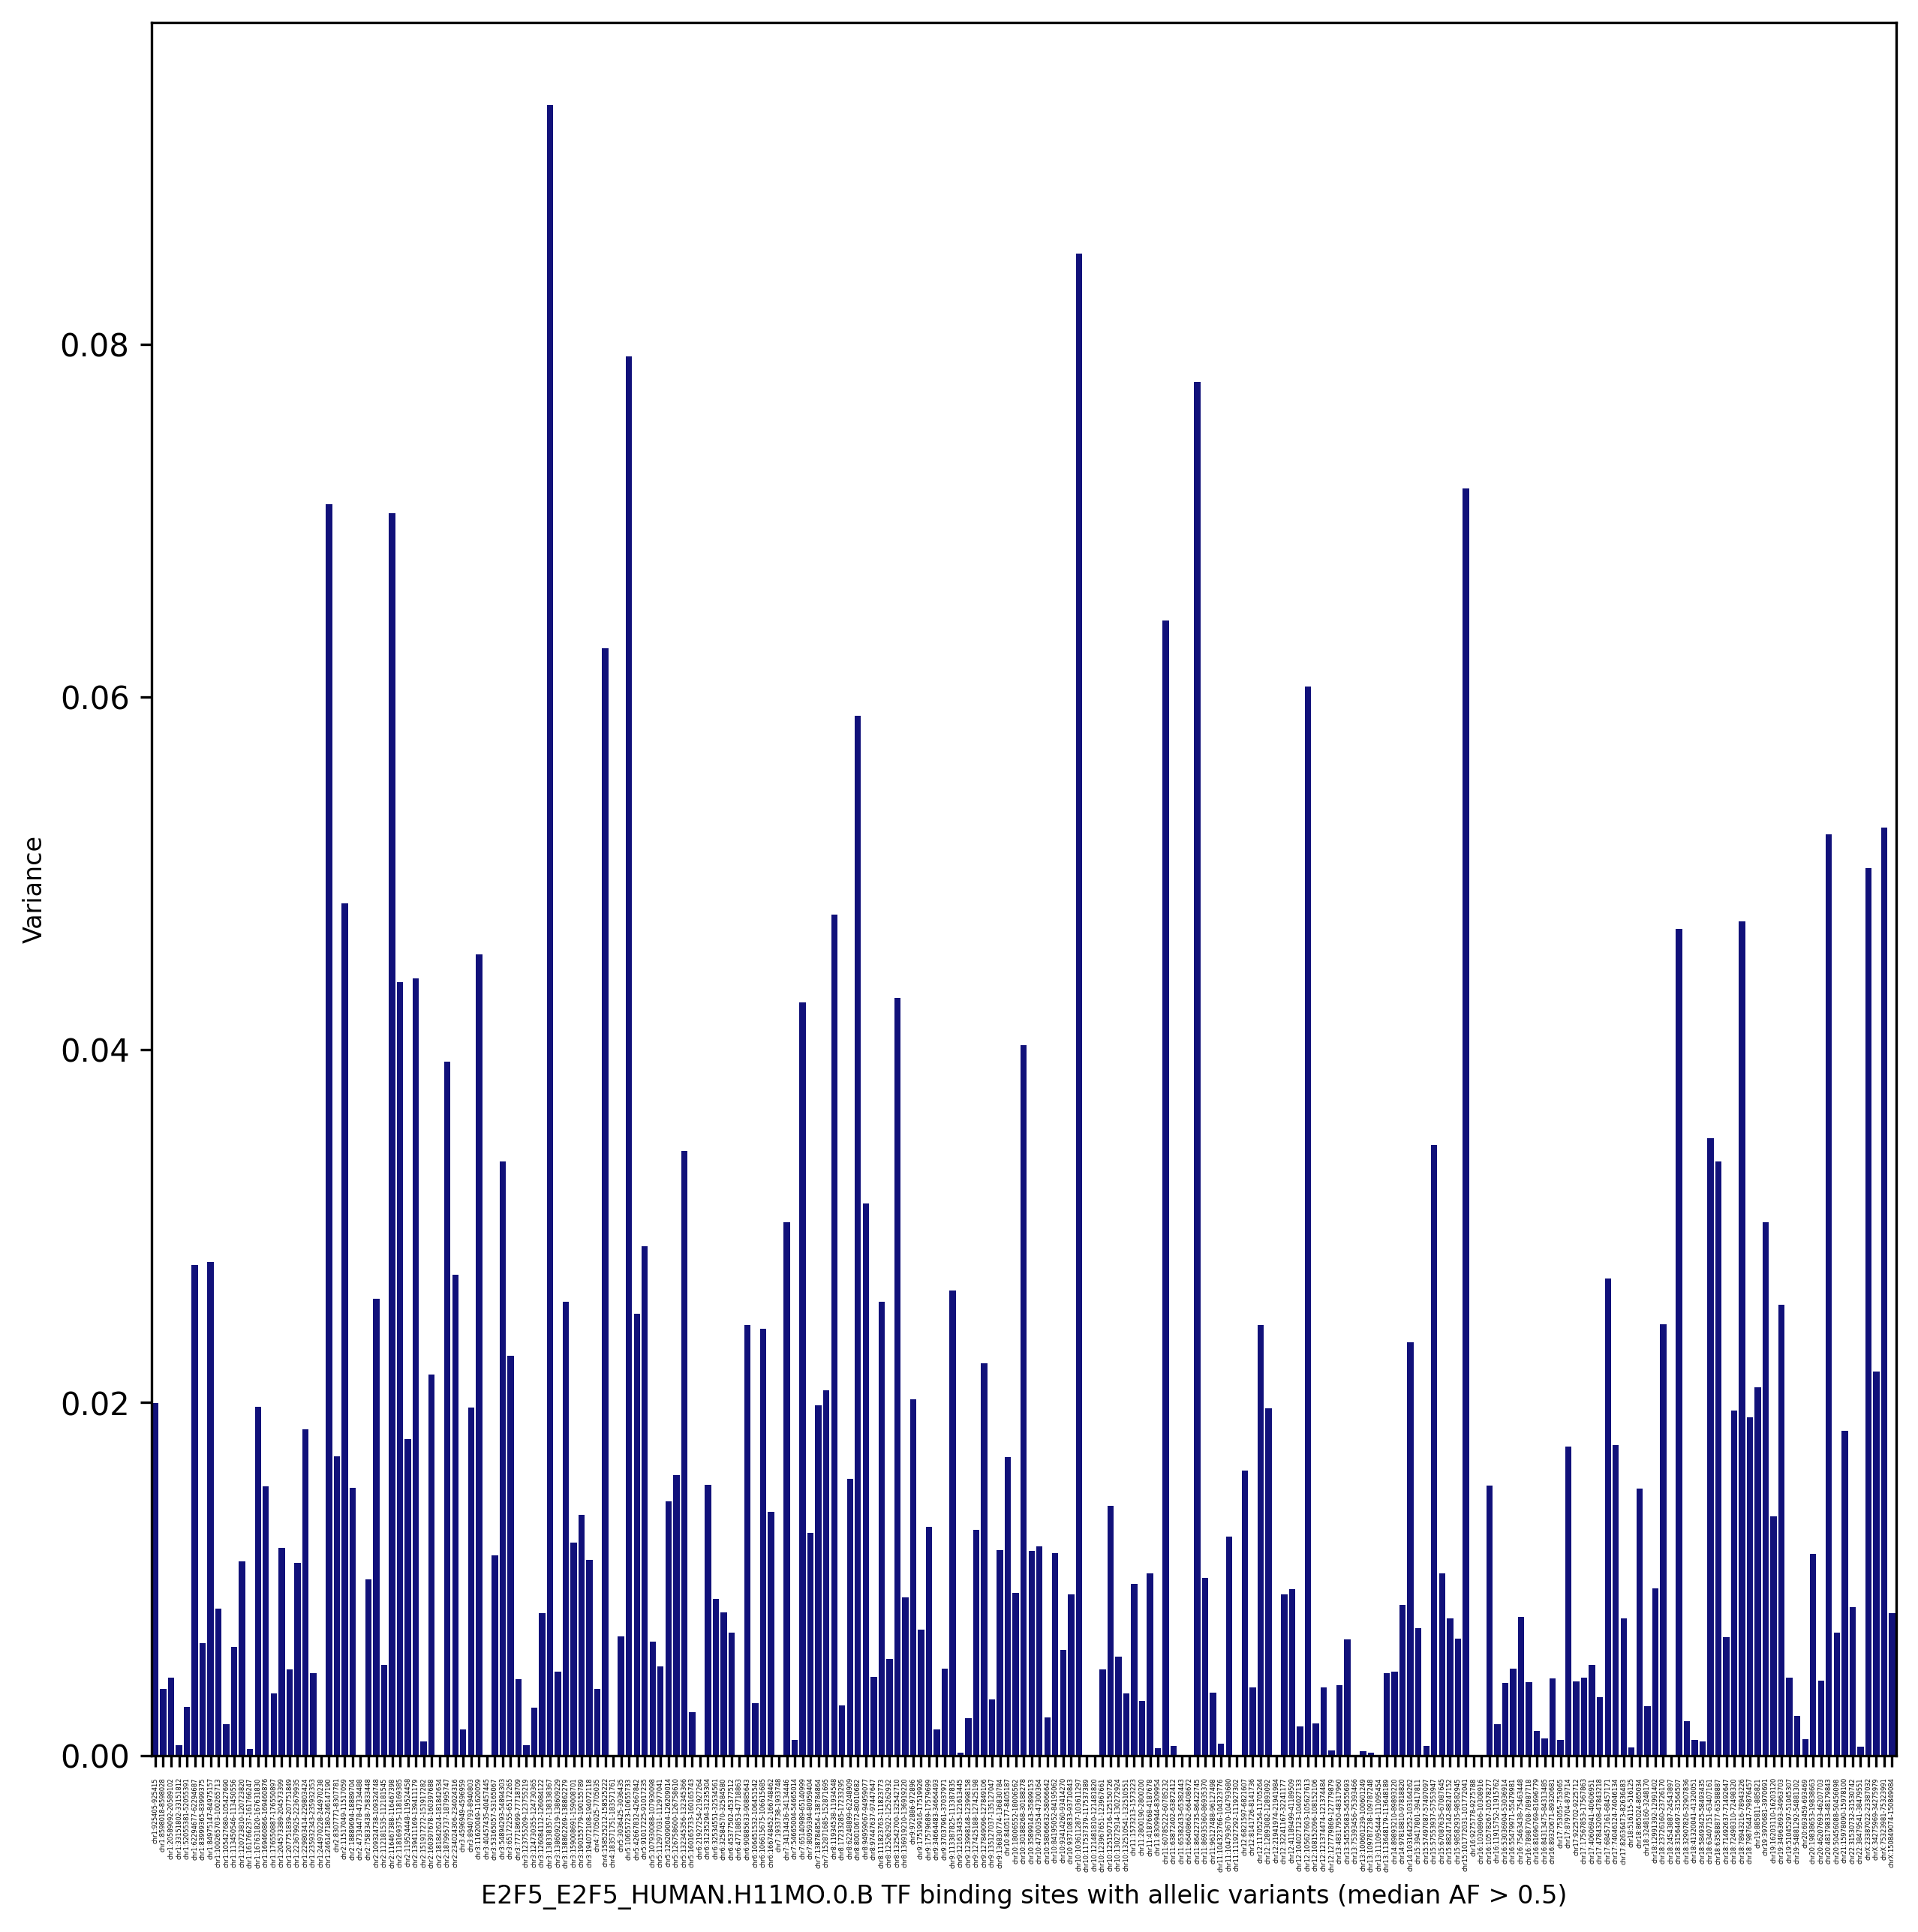

In [73]:
# plot count plot for high AF set
plt.figure(figsize=(10, 10), dpi=300)
sns.barplot(x='region_id', y='AF_var', data=high_af, color='darkblue')
plt.xticks(rotation=90, fontsize=2)
plt.xlabel(f'{motif_id} TF binding sites with allelic variants (median AF > 0.5)', fontsize=8)
plt.ylabel('Variance', fontsize=8)
plt.show()